### House price prediction using Multiple Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
dataset = pd.read_csv('C:\\Users\\Olivia\\Desktop\\Human_Detector\\ParisHousing.csv')
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
print(dataset.info())
print()

print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

### Checking for correlation between the attributes and the predicted variable

In [4]:
corr_matrix = dataset.corr()

corr_matrix['price'].sort_values(ascending = False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

In [5]:
dataset.describe()


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [6]:
dataset.isnull().any()

squareMeters         False
numberOfRooms        False
hasYard              False
hasPool              False
floors               False
cityCode             False
cityPartRange        False
numPrevOwners        False
made                 False
isNewBuilt           False
hasStormProtector    False
basement             False
attic                False
garage               False
hasStorageRoom       False
hasGuestRoom         False
price                False
dtype: bool

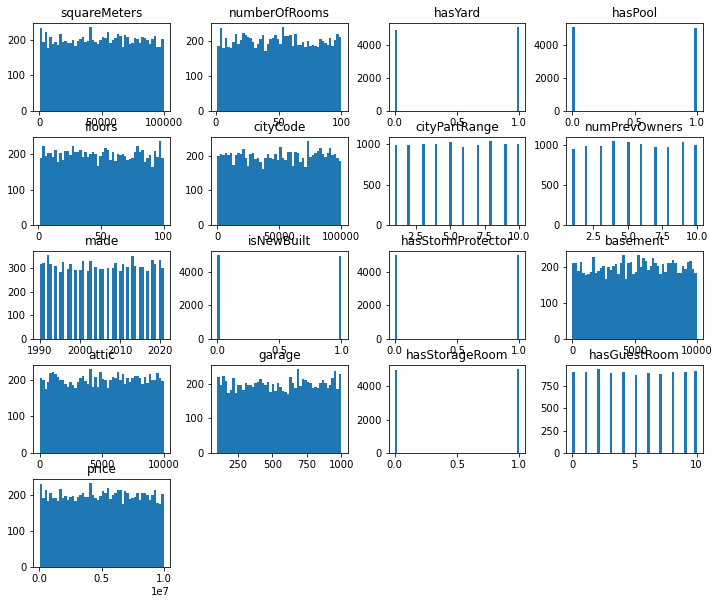

In [7]:
#First approach to plot a histogram for the various numerical dataset
dataset.hist(bins= 50, figsize=(12, 10), grid = False)
print()
plt.show()
print()

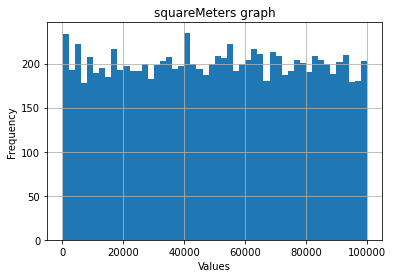

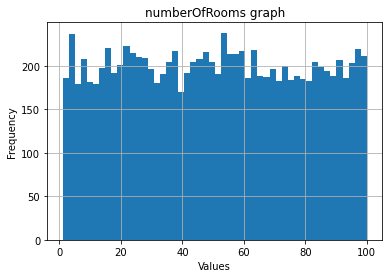

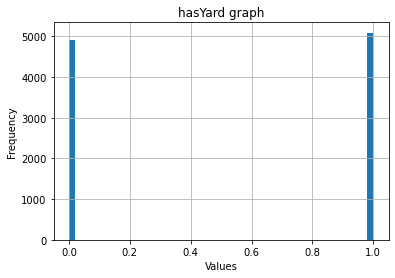

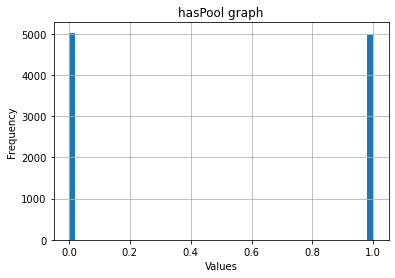

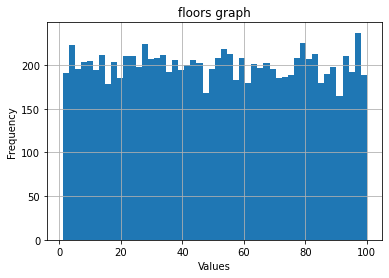

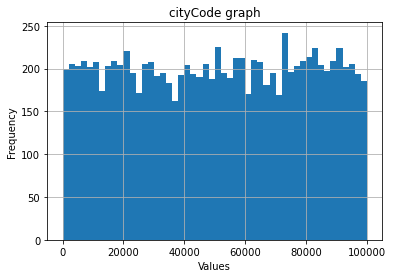

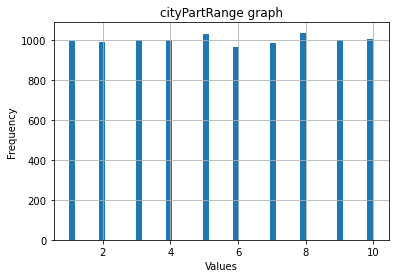

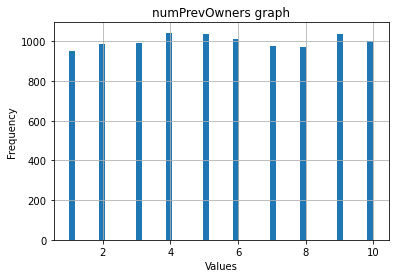

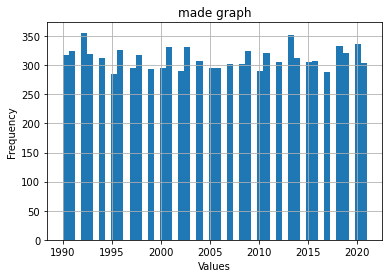

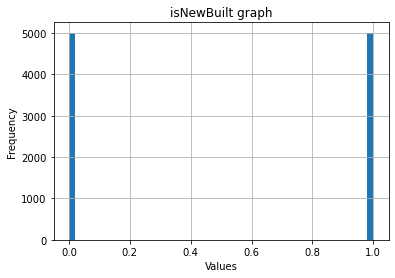

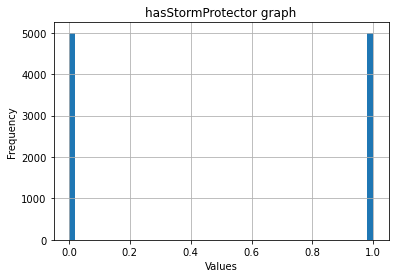

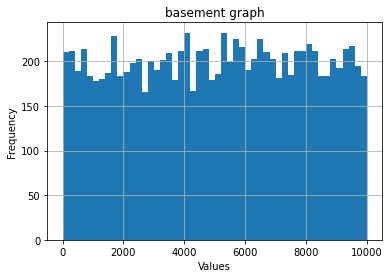

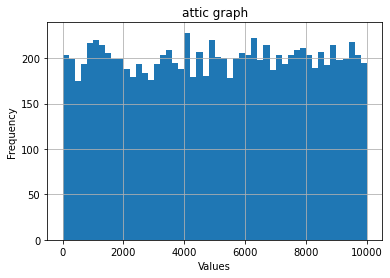

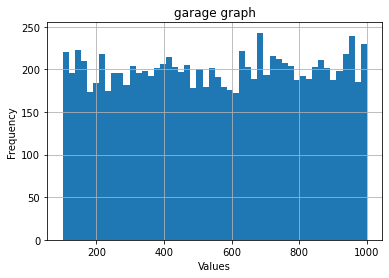

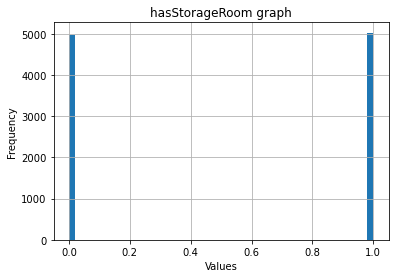

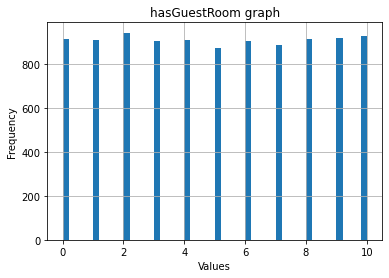

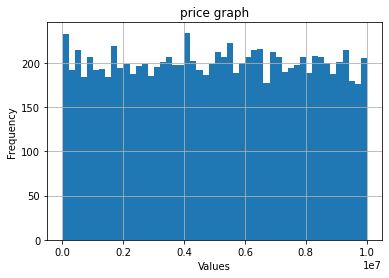

In [8]:
#Second approach in plotting the histogram
for column in dataset.columns:
    dataset[column].hist(bins = 50)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f"{column} graph")
    plt.show()

### Separating the target variable from the dataset


In [9]:
X = dataset.drop('price', axis =1)
Y = dataset['price']
print(X.shape, Y.shape)

(10000, 16) (10000,)


### Splitting the dataset into train test split


In [10]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [11]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8000, 16) (2000, 16) (8000,) (2000,)


### Training the Model

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,Y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

y_pred

array([7962638.49058964, 3715852.21234054, 8553849.80785994, ...,
       1951271.36251268, 2945553.06899966, 7042691.64493203])

In [15]:
#Changing the display format of the floating point values 
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [16]:
df_pred = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': y_pred})

df_pred

,Actual Value,Predicted Value
6252,7964369.60,7962638.49
4684,3713548.90,3715852.21
1731,8553019.20,8553849.81
4742,6428666.20,6430587.42
4521,6465184.90,6465276.57
...,...,...
6412,6951279.20,6952200.16
8285,8152737.70,8153537.45
7853,1947709.80,1951271.36
1095,2944295.30,2945553.07


In [17]:
residual = Y_test - y_pred

In [18]:
print(residual)

6252    1731.11
4684   -2303.31
1731    -830.61
4742   -1921.22
4521     -91.67
         ...   
6412    -920.96
8285    -799.75
7853   -3561.56
1095   -1257.77
6929    -965.94
Name: price, Length: 2000, dtype: float64


### Model Evaluation

In [19]:
#Calculating the mean absolute error
mae = mean_absolute_error(Y_test, y_pred)
print(f'The mean absolute error: {mae}')

The mean absolute error: 1510.0341808542348


In [20]:
#Calculating the mean squared error
mse = mean_squared_error(Y_test, y_pred)
print(f'The mean squared error is: {mse}')

The mean squared error is: 3695708.440619088


In [21]:
#Calculating the root mean squraed error
rmse = np.sqrt(mse)
print(f"The root mean squared error : {rmse}")
    

The root mean squared error : 1922.4225447645706


<AxesSubplot:>

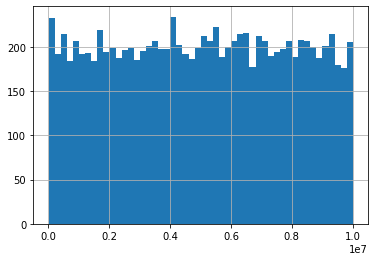

In [22]:
dataset['price'].hist(bins= 50)

### Verifying the Accuracy of the model using R2 Score

In [23]:
r2_train = model.score(X_train, Y_train)
r2_test = model.score(X_test, y_pred)

In [24]:
print(f"The R-Squared score on train set: {r2_train} ")
print(f"The R-Squared score on test set: {r2_test} ")

The R-Squared score on train set: 0.9999995615399574 
The R-Squared score on test set: 1.0 


### Performing a cross validation

In [32]:
cross_val_scores = cross_val_score(model, X, Y, cv = 3)

In [33]:
print(f"The cross-validated R-squared score: {cross_val_scores}")
print(f"Mean cross-validated R-squared score: {cross_val_scores.mean()}")

The cross-validated R-squared score: [0.99999954 0.99999958 0.99999957]
Mean cross-validated R-squared score: 0.9999995640858838
